<a href="https://colab.research.google.com/github/KenNgan776/PythonNotebook/blob/main/Ken_Linear_Regression_with_Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
# Rename some variable and use it for my new dataframe

df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat': 'LSTAT'})

In [17]:
df[["LSTAT", "RM", "TARGET"]].head()

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


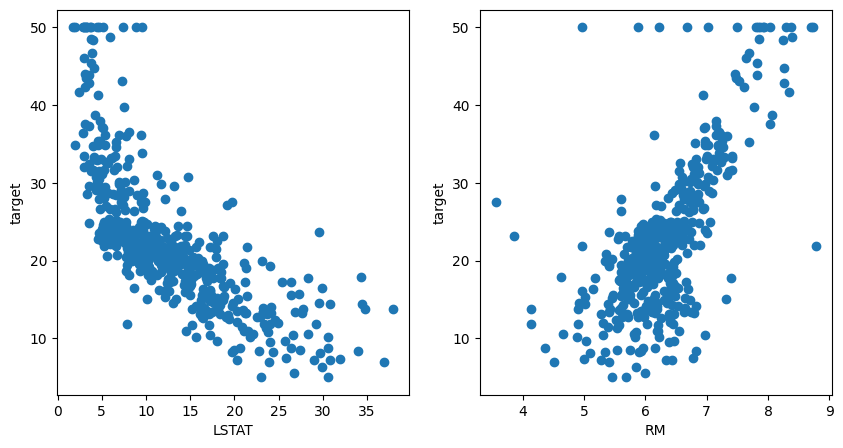

In [19]:
plt.figure(figsize=(8,4))

features = df[["LSTAT", "RM"]]
target = df["TARGET"]

plt.subplot(1,2,1)
plt.scatter(df["LSTAT"], target)
plt.xlabel("LSTAT")
plt.ylabel("target")

plt.subplot(1,2,2)
plt.scatter(df["RM"], target)
plt.xlabel("RM")
plt.ylabel("target")

plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=23)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
intercept = model.intercept_
coff = model.coef_

In [26]:
intercept

0.37428615187841885

In [28]:
coff

array([-0.66721079,  4.88331552])

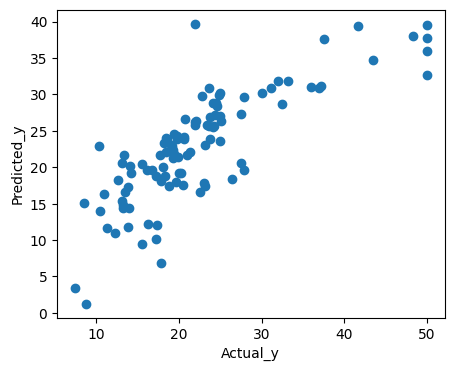

In [24]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual_y")
plt.ylabel("Predicted_y")
plt.show()

In [31]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2                 :", r2)

Mean Squared Error: 30.726065211573893
Mean Absolute Error: 4.300122669036365
R2                 : 0.6433023932639312


In [32]:
from types import new_class
new_houses_data ={
    "LSTAT": [5.0, 4.0, 15.0],
    "RM": [7, 6, 8]
}

new_houses_df = pd.DataFrame(new_houses_data)
new_houses_df

,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [33]:
predicted_house_prices = model.predict(new_houses_df)
predicted_house_prices

array([31.22144086, 27.00533613, 29.43264846])

In [34]:
new_houses_df["Predicted Prices"] = predicted_house_prices
new_houses_df

,LSTAT,RM,Predicted Prices
0,5.0,7,31.221441
1,4.0,6,27.005336
2,15.0,8,29.432648
